# PROYECTO 6

## Librerías y datos

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from scipy import stats as st
import math as mt
from math import factorial
import seaborn as sns 

In [2]:
df_games = pd.read_csv("/datasets/games.csv")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparación de datos

### Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [3]:
df_games.columns = df_games.columns.str.lower()

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Convierte los datos en los tipos necesarios.

In [5]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#FUNCIONES PARA CONVERSDIÓN DE DATOS

#Verificar capacidad de conversión
def conversion_dato(DataFrame, ColumList, Type):
    #Parámetro Type 1 Entero 2 Categóricos, Object, String 3 Flotante
    #Con esta función verifica si tiene el formato correcto del que se especifique para las columnas especificada
    #Retorna True si esta cumple en su totalidad (formato correcto y sin valores ausentes)
    if Type == 1:
        Type_Name = "Entero"
    elif Type == 2:
        Type_Name = "Cadena"
    else:
        Type_Name = "Flotante"
        
    dir_result={'Conversion':Type_Name}
    for col in ColumList:
        if Type==1:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype(int))
            except:
                bool = False
            dir_result.update({col:bool})
        elif Type==2:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype("category"))
            except:
                bool = False
            dir_result.update({col:bool})
        elif Type==3:
            try:
                bool = np.array_equal(DataFrame[col],DataFrame[col].astype(float))
            except:
                bool = False
            dir_result.update({col:bool})
    return dir_result
        
#Valores ausentes
def columnas_ausentes(DataFrame):
    #Verifica la cantidad y la columnas que contienen valores ausentes de un DataFrame
    dir={}
    for col in DataFrame.columns.values:
        if DataFrame[col].isnull().sum() > 0:
            dir.update({col:int(DataFrame[col].isnull().sum())})
    return dir

#Tipo de datos columa
def tipo_dato_columnas(DataFrame,Columna):
    #Retorna el tipo de dato que es compatible todos los dtos de una columna sin contar valores nulos
    #Esta función no elimina datos nulos del dataframe de entrada
    list=[]
    df = DataFrame[Columna].dropna()
    try:
        d_int = np.array_equal(df,df.astype(int))
    except:
        d_int = False
    if d_int:
        list.append('Int')
        
    try:
        d_str = np.array_equal(df,df.astype("category"))
    except:
        d_str = False
    if d_str:
        list.append('Str')

    try:
        d_flt = np.array_equal(df,df.astype(float))
    except:
        d_flt = False
    if d_flt:
        list.append('Float')
    
    return {Columna:list}

In [7]:
print(conversion_dato(df_games,df_games.columns.values,1))

{'Conversion': 'Entero', 'name': False, 'platform': False, 'year_of_release': False, 'genre': False, 'na_sales': False, 'eu_sales': False, 'jp_sales': False, 'other_sales': False, 'critic_score': False, 'user_score': False, 'rating': False}


In [8]:
#Cambiar los valores nulos por 0
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)

In [9]:
df_games['year_of_release']=df_games['year_of_release'].astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

- Fue cambiada a entero la columna de "year_of_release" que estaba en flotante ya que los años son números enteros

### Si es necesario, elige la manera de tratar los valores ausentes:

In [10]:
print(df_games['name'].unique())
print()
print(df_games['genre'].unique())
print()
print(df_games['critic_score'].unique())
print()
print(df_games['user_score'].unique())
print()
print(df_games['rating'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5

In [11]:
df_games[df_games.isna().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#COMPROBAR SI HAY FILAS DUPLICADAS
print(df_games.duplicated().sum())

0


In [13]:
#Comprobar datos existentes
print(df_games['name'].unique())
print()
print(df_games['genre'].unique())
print()
print(df_games['critic_score'].unique())
print()
print(df_games['user_score'].unique())
print()
print(df_games['rating'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5

In [14]:
#Eliminamos el valor nulo sustituyendolo con la palabra 'undefined' ya que es de tipo object
df_games['genre']=df_games['genre'].fillna('undefined')
#Eliminamos el valor nulo sustituyendolo con en número -1 para evitar que existan nulos
df_games['critic_score']=df_games['critic_score'].fillna(-1)
#Eliminamos el valor nulo sustituyendolo con en número -1 para evitar que existan nulos
df_games['user_score']=df_games['user_score'].fillna(-1)
#Eliminamos el valor nulo sustituyendolo con la palabra 'undefined' ya que es de tipo object
df_games['rating']=df_games['rating'].fillna('undefined')

In [15]:
#Comprobar que no existan datos nulos
print(df_games['name'].unique())
print()
print(df_games['genre'].unique())
print()
print(df_games['critic_score'].unique())
print()
print(df_games['user_score'].unique())
print()
print(df_games['rating'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 'undefined']

[76. -1. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' -1 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.

### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

- Primeramente algo que nunca se puede descartar por fallas técnicas
- No se pudieron obtener fuentes de ello para recolectar

- Al decir a determinar significa que existe la posibilidad de determinarlo manualmente por lo cual será sacando el promedio

In [16]:
df_games['user_score'] = df_games['user_score'].replace('tbd',0)

In [17]:
df_games['user_score'] = df_games['user_score'].astype(float)
print(df_games['user_score'].unique())

[ 8.  -1.   8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
  8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
  7.3  4.3  7.6  5.7  5.   9.1  6.5  0.   8.8  6.9  9.4  6.8  6.1  6.7
  5.4  4.   4.9  4.5  9.3  6.2  4.2  6.   3.7  4.1  5.8  5.6  5.5  4.4
  4.6  5.9  3.9  3.1  2.9  5.2  3.3  4.7  5.1  3.5  2.5  1.9  3.   2.7
  2.2  2.   9.5  2.1  3.6  2.8  1.8  3.8  1.6  9.6  2.4  1.7  1.1  0.3
  1.5  0.7  1.2  2.3  0.5  1.3  0.2  0.6  1.4  0.9  1.   9.7]


In [18]:
df_games['user_score'] = df_games['user_score'].replace(0,df_games['user_score'].mean())

In [19]:
print(df_games['user_score'].unique())

[ 8.         -1.          8.3         8.5         6.6         8.4
  8.6         7.7         6.3         7.4         8.2         9.
  7.9         8.1         8.7         7.1         3.4         5.3
  4.8         3.2         8.9         6.4         7.8         7.5
  2.6         7.2         9.2         7.          7.3         4.3
  7.6         5.7         5.          9.1         6.5         2.83446605
  8.8         6.9         9.4         6.8         6.1         6.7
  5.4         4.          4.9         4.5         9.3         6.2
  4.2         6.          3.7         4.1         5.8         5.6
  5.5         4.4         4.6         5.9         3.9         3.1
  2.9         5.2         3.3         4.7         5.1         3.5
  2.5         1.9         3.          2.7         2.2         2.
  9.5         2.1         3.6         2.8         1.8         3.8
  1.6         9.6         2.4         1.7         1.1         0.3
  1.5         0.7         1.2         2.3         0.5         1.3
  0.2

### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [20]:
df_games['total_sales']=df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']

In [21]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,undefined,31.38


## Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [22]:
df_games_1 = df_games.groupby('year_of_release').count().reset_index()
df_games_1 = df_games_1[['year_of_release','name']]
df_games_1 = df_games_1[df_games_1['year_of_release'] > 0]
print(df_games_1)

    year_of_release  name
1              1980     9
2              1981    46
3              1982    36
4              1983    17
5              1984    14
6              1985    14
7              1986    21
8              1987    16
9              1988    15
10             1989    17
11             1990    16
12             1991    41
13             1992    43
14             1993    60
15             1994   121
16             1995   219
17             1996   263
18             1997   289
19             1998   379
20             1999   338
21             2000   350
22             2001   482
23             2002   829
24             2003   775
25             2004   762
26             2005   939
27             2006  1006
28             2007  1197
29             2008  1427
30             2009  1426
31             2010  1255
32             2011  1136
33             2012   653
34             2013   544
35             2014   581
36             2015   606
37             2016   502


<AxesSubplot:title={'center':'VIDEOJUEGOS LANZADOS'}, xlabel='AÑO LANZAMIENTO', ylabel='CANTIDAD'>

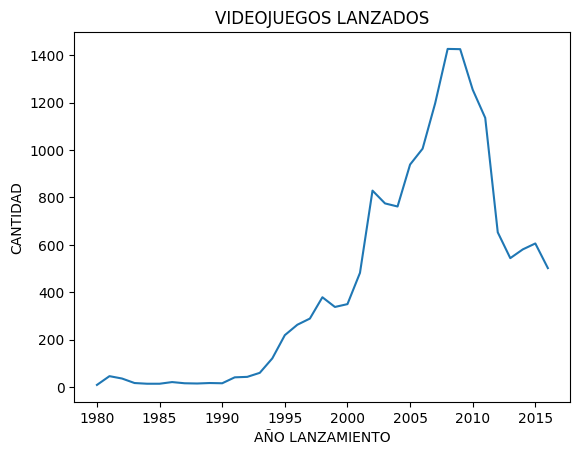

In [23]:
df_games_1.plot(
    x='year_of_release',
    y='name',
    xlabel = 'AÑO LANZAMIENTO',
    ylabel = 'CANTIDAD',
    title = 'VIDEOJUEGOS LANZADOS',
    legend=False
)

In [24]:
df_games_2 = df_games.groupby(['platform']).sum()['total_sales'].reset_index()
df_games_2=df_games_2.sort_values(by='total_sales', ascending=False)
print(df_games_2)

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        30.77
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


<AxesSubplot:title={'center':'VENTAS POR PLATAFORMA'}, xlabel='PLATAFORMA', ylabel='VOLUMEN DE VENTA'>

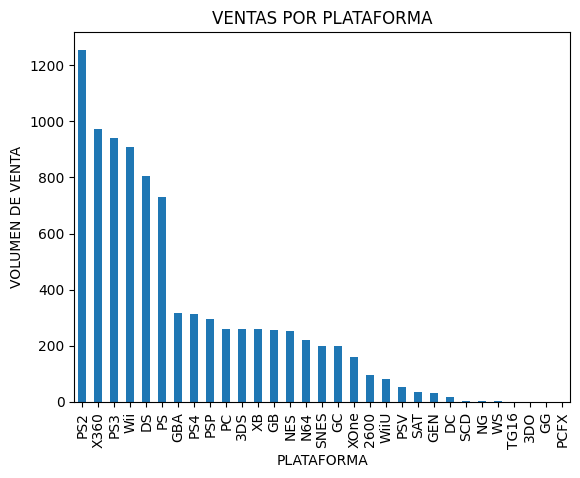

In [25]:
df_games_2.plot(
    kind = 'bar',
    x='platform',
    y='total_sales',
    xlabel = 'PLATAFORMA',
    ylabel = 'VOLUMEN DE VENTA',
    title = 'VENTAS POR PLATAFORMA',
    legend=False
)

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

### - Para este proyecto nos centraremos en los datos a partir del 2013 
- Ventas superiores a 30 mdd

Estos puntos se consideran a que la disperrsión de datos no es tan grande si se consideran contidades inferiores a los ya mencionados.

In [26]:
df_games_3 = df_games[(df_games['year_of_release']>=2013) & (df_games['total_sales']>=1)]
df_games_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 16 to 2056
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             258 non-null    object 
 1   platform         258 non-null    object 
 2   year_of_release  258 non-null    int64  
 3   genre            258 non-null    object 
 4   na_sales         258 non-null    float64
 5   eu_sales         258 non-null    float64
 6   jp_sales         258 non-null    float64
 7   other_sales      258 non-null    float64
 8   critic_score     258 non-null    float64
 9   user_score       258 non-null    float64
 10  rating           258 non-null    object 
 11  total_sales      258 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 26.2+ KB


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [27]:
df_games_4 = df_games_3.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

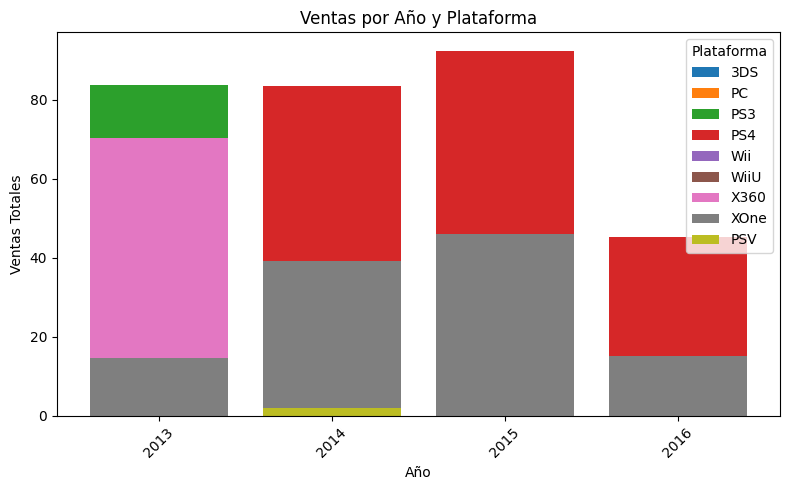

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
for platform in df_games_4['platform'].unique():
    platform_data = df_games_4[df_games_4['platform'] == platform]
    ax.bar(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
# Agregar etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Ventas Totales')
ax.set_title('Ventas por Año y Plataforma')
# Configurar subetiquetas: Un eje X con los años agrupados para cada plataforma
ax.set_xticks(df_games_4['year_of_release'].unique())
ax.set_xticklabels(df_games_4['year_of_release'].unique(),rotation=45)
# Agregar leyenda
ax.legend(title='Plataforma')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Total Sales Per Platform'}, xlabel='Platform', ylabel='Million Dollars'>

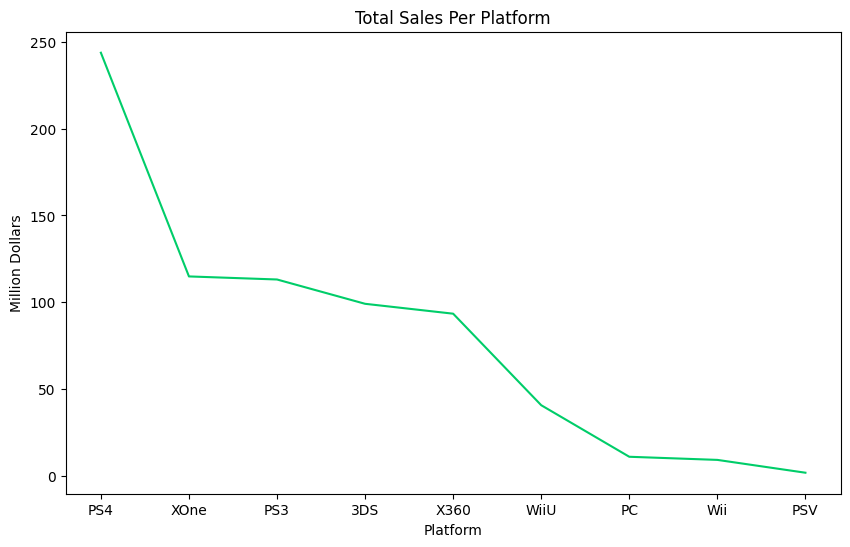

In [29]:
df_games_3.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).plot(kind='line',
                                                  xlabel='Platform',
                                                  ylabel='Million Dollars',
                                                  title='Total Sales Per Platform',
                                                  figsize=(10,6),
                                                  color= '#00cd69')

- Las plataformas que crecen son XOne y PS4, las que decrecen son X360 y PSV

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

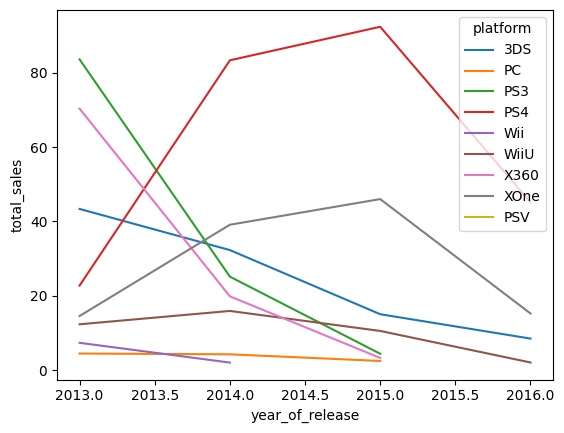

In [37]:
# CÓDIGO REVISOR
sns.lineplot(data= df_games_3.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index(), 
             x='year_of_release',
             y='total_sales',
             hue='platform') 

###  Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [30]:
actual_platforms = ['PS4','XOne']
sales_by_year_platform = df_games_3[(df_games_3['platform'].isin(actual_platforms)) & (df_games_3['year_of_release']>= 2013)]
ps4 = sales_by_year_platform[sales_by_year_platform ['platform'] =='PS4']
xone = sales_by_year_platform[sales_by_year_platform ['platform']=='XOne']

In [31]:
def calcular_limites_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
   
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
   
    return lower_limit, upper_limit

In [32]:
lower_limit_ps4, upper_limit_ps4 = calcular_limites_outliers(ps4['total_sales'])
ps4_filtrado = ps4[(ps4['total_sales'] >= lower_limit_ps4) & (ps4['total_sales'] <= upper_limit_ps4)]
# Calcula la media y la varianza de las ventas por plataforma sin outliers
#Calculos PS4 media, mediana y varianza
media_ps4 = ps4['total_sales'].mean()
mediana_ps4 = ps4['total_sales'].median()
variance_ps4 = np.var(ps4['total_sales'])
print('Media, mediana y varianza de PS4 son : ',media_ps4.round(2),',', mediana_ps4,',', np.round(variance_ps4, 2))

Media, mediana y varianza de PS4 son :  3.12 , 2.165 , 6.01


In [33]:
lower_limit_xone, upper_limit_xone = calcular_limites_outliers(xone['total_sales'])
xone_filtrado = xone[(xone['total_sales'] >= lower_limit_xone) & (xone['total_sales'] <= upper_limit_xone)]
media_xone = xone['total_sales'].mean()
mediana_xone = xone['total_sales'].median()
variance_xone = np.var(xone['total_sales'])
print('Media, mediana y varianza de XOne son :',media_xone.round(2),', ', mediana_xone,', ', np.round(variance_xone,2))

Media, mediana y varianza de XOne son : 2.25 ,  1.73 ,  1.71


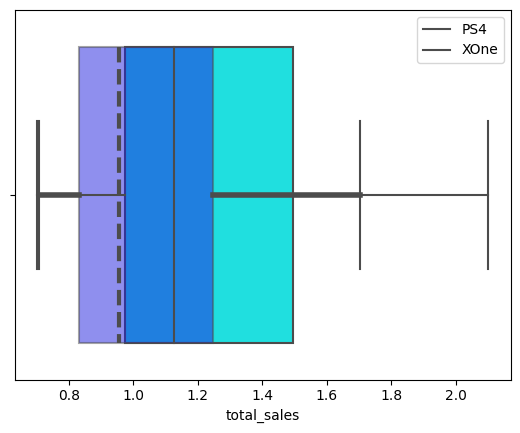

In [34]:
sns.boxplot(np.log1p(ps4_filtrado['total_sales']),
            color ='cyan',
            flierprops = dict(markerfacecolor = 'pink', marker = 'o'),
           )
sns.boxplot(np.log1p(xone_filtrado['total_sales']),
            color='blue',
            boxprops = dict(alpha=0.5),
           
whiskerprops=dict(markerfacecolor='lightblue',linewidth=4),
medianprops =dict(linewidth=3, linestyle='--')
           )
plt.legend(labels=['PS4','XOne'])
plt.show()

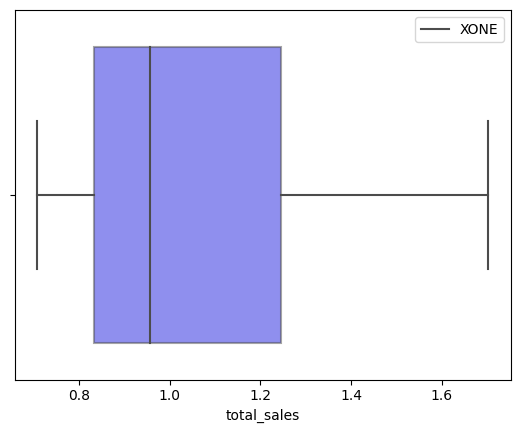

In [35]:
sns.boxplot(np.log1p(xone_filtrado['total_sales']),
            color='blue',
            boxprops = dict(alpha=0.5)
           )

whiskerprops=dict(markerfacecolor='lightblue',linewidth=4),
medianprops =dict(linewidth=3, linestyle='--')
           
plt.legend(labels=['XONE'])
plt.show()

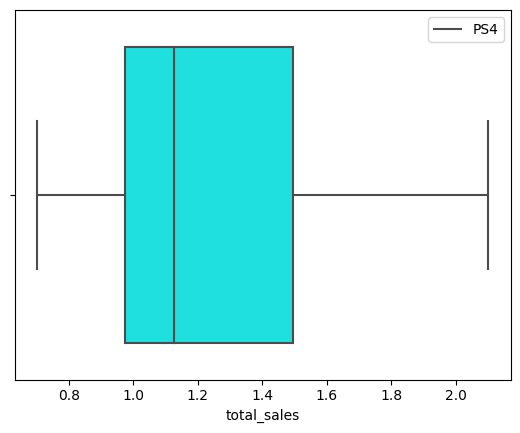

In [36]:
sns.boxplot(np.log1p(ps4_filtrado['total_sales']),
            color ='cyan',
            flierprops = dict(markerfacecolor = 'pink', marker = 'o'),
           )

           
whiskerprops=dict(markerfacecolor='lightblue',linewidth=4),
medianprops =dict(linewidth=3, linestyle='--')
           
plt.legend(labels=['PS4'])
plt.show()

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

La correlación que existe entre las ventas y la reseña de los críticos es : -0.02
La correlación que existe entre las ventas y la reseña de los usuarios es : -0.13


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


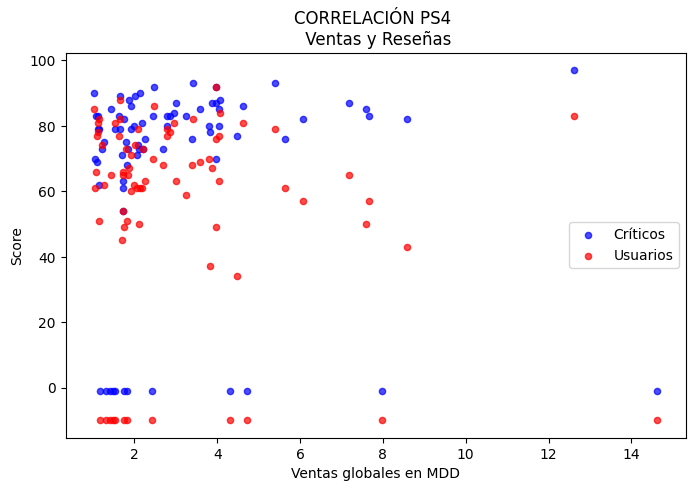

In [37]:
#Cálculo de correlación entre reseñas y las ventas de ps4 
#Correlación de 'critic_score' y 'total_sales'
corr_sales_critic = ps4['total_sales'].corr(ps4['critic_score'])
print('La correlación que existe entre las ventas y la reseña de los críticos es :', corr_sales_critic.round(2))
#Correlación de 'user_score' y 'total_sales
corr_sales_user = ps4['total_sales'].corr(ps4['user_score'])
print('La correlación que existe entre las ventas y la reseña de los usuarios es :', corr_sales_user.round(2))

#Homologamos los scores para fines del gráfico comparativo
ps4.loc[:,'user_score_homolog'] = ps4['user_score']*10
#gráfica de dispersión 
fig, ax = plt.subplots(figsize=(8, 5))
# Graficamos ventas vs score de críticos
ps4.plot(kind='scatter',
         x='total_sales', 
         y='critic_score',  
         alpha=0.7,        
         ax=ax, label="Críticos", color='blue')
# Graficamos ventas vs user_score homologado
ps4.plot(kind='scatter',
         x='total_sales', 
         y='user_score_homolog',  
         alpha=0.7,        
         ax=ax, label="Usuarios", color='red')
plt.title('CORRELACIÓN PS4 \n Ventas y Reseñas')
plt.xlabel('Ventas globales en MDD')
plt.ylabel('Score')
plt.show()
ps4.loc[:,'user_score_homolog'] = ps4['user_score']*10

La correlación que existe entre las ventas y la reseña de los críticos es : -0.26
La correlación que existe entre las ventas y la reseña de los usuarios es : -0.48


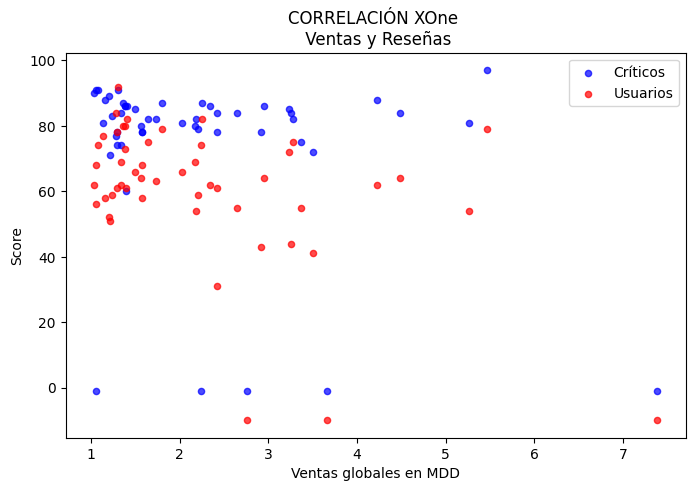

In [38]:
#Cálculo de correlación entre reseñas y las ventas, de XOne
#Correlación de 'critic_score' y 'total_sales'
corr_sales_critic_x = xone['total_sales'].corr(xone['critic_score'])
print('La correlación que existe entre las ventas y la reseña de los críticos es :', corr_sales_critic_x.round(2))
#Correlación de 'user_score' y 'total_sales
corr_sales_user_x = xone['total_sales'].corr(xone['user_score'])
print('La correlación que existe entre las ventas y la reseña de los usuarios es :', corr_sales_user_x.round(2))
#Homologamos los scores para fines del gráfico comparativo
xone.loc[:,'user_score_homolog'] = xone['user_score']*10
#gráfica de dispersión 
fig, ax = plt.subplots(figsize=(8, 5))
# Graficamos ventas vs score de críticos
xone.plot(kind='scatter',
         x='total_sales', 
         y='critic_score',  
         alpha=0.7,        
         ax=ax, label="Críticos", color='blue')
# Graficamos ventas vs user_score homologado
xone.plot(kind='scatter',
         x='total_sales', 
         y='user_score_homolog',  
         alpha=0.7,        
         ax=ax, label="Usuarios", color='red')
plt.title('CORRELACIÓN XOne \n Ventas y Reseñas')
plt.xlabel('Ventas globales en MDD')
plt.ylabel('Score')
plt.show()

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

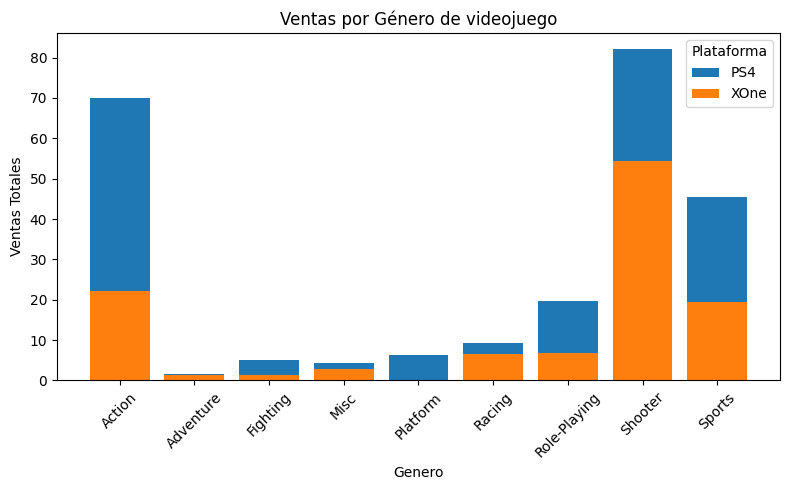

In [39]:
#Agrupamos por genero en el DF filtrado de ambas plataformas.
genre_ps4_xone= sales_by_year_platform.groupby(['genre','platform'])['total_sales'].sum().reset_index()
#Graficamos 
fig, ax = plt.subplots(figsize=(8, 5))
for platform in genre_ps4_xone['platform'].unique():
    platform_data = genre_ps4_xone[genre_ps4_xone['platform'] == platform]
    ax.bar(platform_data['genre'], platform_data['total_sales'],label=platform)
# Agregar etiquetas y leyenda
ax.set_xlabel('Genero')
ax.set_ylabel('Ventas Totales')
ax.set_title('Ventas por Género de videojuego')
# Configurar subetiquetas: Un eje X con los años agrupados para cada plataforma
ax.set_xticks(genre_ps4_xone['genre'].unique())
ax.set_xticklabels(genre_ps4_xone['genre'].unique(), rotation=45)
# Agregar leyenda
ax.legend(title='Plataforma')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Crea un perfil de usuario para cada región
Para cada región (NA, UE, JP) determina:

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

  platform  na_sales  eu_sales  jp_sales  total_regions_sales
3      PS4     84.74    113.11      7.53               205.38
8     XOne     67.53     36.73      0.27               104.53
2      PS3     41.06     47.60      6.17                94.83
0      3DS     28.74     22.20     43.54                94.48
7     X360     56.60     28.36      0.26                85.22


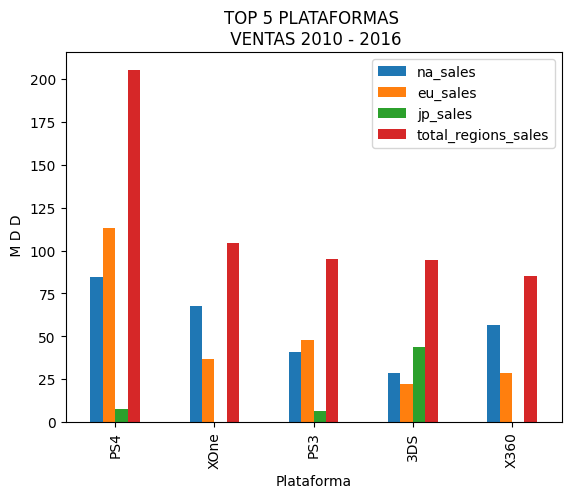

In [40]:
#Agruparemos por región y su total de ventas
ventas_regionales = df_games_3.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum().reset_index()
#Creamos las ventas regionales
ventas_regionales['total_regions_sales'] =ventas_regionales['na_sales'] + ventas_regionales['eu_sales'] + ventas_regionales['jp_sales']
# Obtener plataformas únicas
plataformas_unicas = ventas_regionales.index.unique()
# Ordenar las plataformas únicas por las ventas totales de mayor a menor
ventas_regionales_sorted = ventas_regionales.loc[plataformas_unicas].sort_values('total_regions_sales', ascending=False)
# Elegir las primeras 5 plataformas con mayores ventas
top_5_platforms = ventas_regionales_sorted.head(5)
# Mostrar los resultados
print(top_5_platforms)
#Graficar las cinco plataformas principales a partir del 2010 al 2016
top_5_platforms.plot(kind = 'bar',
                    x ='platform',
                    xlabel ='Plataforma',
                    ylabel = ' M D D',
                    title = 'TOP 5 PLATAFORMAS \n VENTAS 2010 - 2016')
plt.show()

### Los cinco géneros principales. Explica la diferencia.

           genre  na_sales  eu_sales  jp_sales  total_reg_sales
0         Action     81.77     74.69     13.87           170.33
8        Shooter     92.40     71.21      5.50           169.11
10        Sports     45.04     45.66      0.61            91.31
7   Role-Playing     31.50     26.30     30.12            87.92
3           Misc     15.48     12.55      2.69            30.72


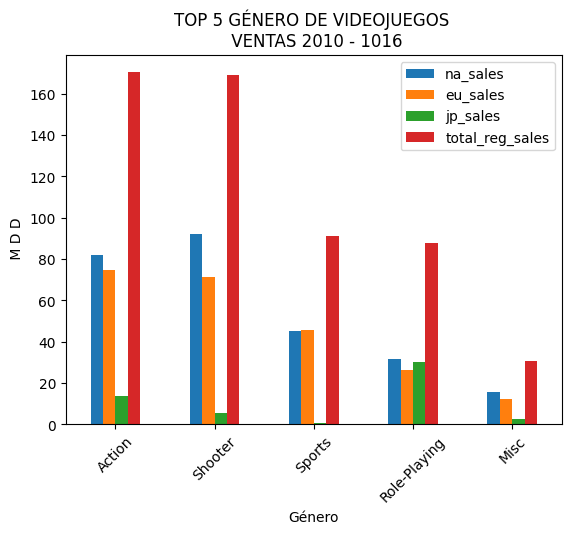

In [41]:
#Agruparemos por género de videojuego y su total de ventas
genero_regional = df_games_3.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum().reset_index()
#Creamos las ventas regionales por género de videojuego
genero_regional['total_reg_sales'] = genero_regional['na_sales'] + genero_regional['eu_sales'] + genero_regional['jp_sales']
# Obtener géneros únicos
genero_unico = genero_regional.index.unique()
# Ordenar género por las ventas totales de mayor a menor
genero_regional_sorted = genero_regional.loc[genero_unico].sort_values('total_reg_sales',ascending=False)
# Elegir las primeras 5 plataformas con mayores ventas
top_5_genres= genero_regional_sorted.head(5)
# Mostrar los resultados
print(top_5_genres)
#Graficar las cinco géneros mas rentables del 2010 al 2016
top_5_genres.plot(kind = 'bar',
                    x ='genre',
                    xlabel ='Género',
                    ylabel = ' M D D',
                    title = 'TOP 5 GÉNERO DE VIDEOJUEGOS \n VENTAS 2010 - 1016')
plt.xticks(rotation=45)
plt.show()

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

      rating  na_sales  eu_sales  jp_sales  total_esrb_sales
2          M    131.44    115.55      8.29            255.28
4  undefined     61.65     51.88     39.16            152.69
0          E     59.47     62.31     10.83            132.61
3          T     30.21     24.59      5.19             59.99
1       E10+     23.03     16.12      3.08             42.23


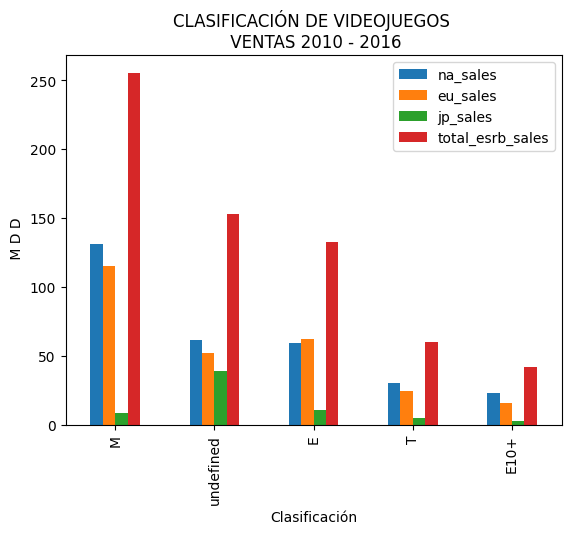

In [42]:
#Agruparemos por clasificación ESRB de videojuego y su total de ventas
esrb_regional = df_games_3.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum().reset_index()
#Creamos las ventas regionales por clasificación de videojuego
esrb_regional['total_esrb_sales'] = esrb_regional['na_sales'] + esrb_regional['eu_sales'] + esrb_regional['jp_sales']
# Obtener géneros únicos
esrb_unico = esrb_regional.index.unique()
# Ordenar género por las ventas totales de mayor a menor
esrb_regional_sorted = esrb_regional.loc[esrb_unico].sort_values('total_esrb_sales',ascending=False)
# Mostrar los resultados
print(esrb_regional_sorted)
#Graficar las ventas de acuerdo a las clasificaciones de los videojuegos del 2010 al 2016
esrb_regional_sorted.plot(kind = 'bar',
                    x ='rating',
                    xlabel ='Clasificación',
                    ylabel = ' M D D',
                    title = 'CLASIFICACIÓN DE VIDEOJUEGOS \n VENTAS 2010 - 2016')
plt.show()

## Prueba las siguientes hipótesis

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

- Se usará ttest_ind
- Comparemos los promedios.

- Hipótesis: La calificación promedio de los usuarios de XOne y PC es iguales

- Hipótesis: La calificación promedio de los usuarios de XOne es superior a los usuarios de PC

- Dando un valor de significancia de 5%, comprobemos la aceptación o rechazo de la hipótesis nula (H0).

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [43]:
#Prueba de igualdad de las varianzas por método levene
#definimos los dataframes
xone_scores = df_games_3[df_games_3['platform']=='XOne']['user_score']
pc_scores = df_games_3[df_games_3['platform']=='PC']['user_score']
#aplicamos el método levene
stat, p_value = st.levene(xone_scores, pc_scores)
print('p_value: ', p_value)
#definir si las varianzas son iguales o diferentes con un valor de significancia al 5%
if p_value < 0.05:
    print('Las varianzas no son iguales.')
else:
    print('Las varianzas son iguales.')

p_value:  0.13980521521456513
Las varianzas son iguales.


- En base a la prueba anterior podemos determinar que las varianzas no son iguales por tanto aplicaremos en nuestra prueba de hipótesis equal_var=False

In [44]:
# Prueba de hipótesis de que dos medias son iguales
#se establece nivel crítico de significación estadística
alpha = 0.05
results= st.ttest_ind(df_games_3[df_games_3['platform']=='XOne']
['user_score'],df_games_3[df_games_3['platform']=='PC']
['user_score'],equal_var = False)
print('valor p:', results.pvalue)
# compara el valor p obtenido con el nivel de significación estadística
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.2887975770487886
No podemos rechazar la hipótesis nula


- No se rechaza la hipótesis nula lo que significa que las medias tienen similitud.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

-Hipótesis: La calificación promedio de los usuarios para los géneros de Acción y Deportes es
diferente.
-Hipótesis: La calificació promedio de los usuarios para los género de Acción es superior al género de Deportes"
El valor de significancia que se dará será de 5%


In [45]:
#Prueba de igualdad de las varianzas por método levene

action_scores =df_games_3[df_games_3['genre']=='Action']['user_score']
sport_scores = df_games_3[df_games_3['genre']=='Sports']['user_score']
#aplicamos el método levenestat, p_value = st.levene(action_scores, sport_scores)
print('p_value: ', p_value)
#definir si las varianzas son iguales o diferentes con un valor de significancia al 5%
if p_value < 0.05:
    print('Las varianzas no son iguales.')
else:
    print('Las varianzas son iguales.')

p_value:  0.13980521521456513
Las varianzas son iguales.


- No son iguales las varianzas

In [46]:
# Prueba de hipótesis de que dos medias son iguales
alpha = 0.05
results=st.ttest_ind(df_games_3[df_games_3['genre']=='Action']
['user_score'], df_games_3[df_games_3['genre']=='Sports']
['user_score'],equal_var = False)
print('valor p:', results.pvalue)
# compara el valor p obtenido con el nivel de significación estadística
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.15868880989993106
No podemos rechazar la hipótesis nula


## Conclusión general

- En este proyecto utilizamos las herramientas de los 5 sprints.
- Observamos que elementos requerimos en un análisis
- Son importante las tomas de deciciones a la hora de determinar que datos utilizar, tratar los datos nulos.
- Graficamente es de suma importancia mostrar los resultados a nuestros clientes.
- Las funciones de pandas son una gran utilidad a la hora de probar hipótesis
- Con respecto al proyecto debemos entender bien el contexto de la información en este caso tecnología de videojuegos donde es muy cambiante y la apreciación de los usuarios también